In [30]:
%matplotlib inline #IPython notebook中的魔法方法，这样每次运行后可以直接得到图像，不再需要使用plt.show()
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
#import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam

# 在MNIST上训练Autoencoder 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据预处理
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test),-1)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
# 输入的大小
input_size = 784
# 隐藏层神经元的大小
hidden_size = 64
# 压缩向量长度为32
compression_size = 32

# autoencoder网络定义
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
compressed_vector = Dense(compression_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(compressed_vector)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1555
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1099
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1021


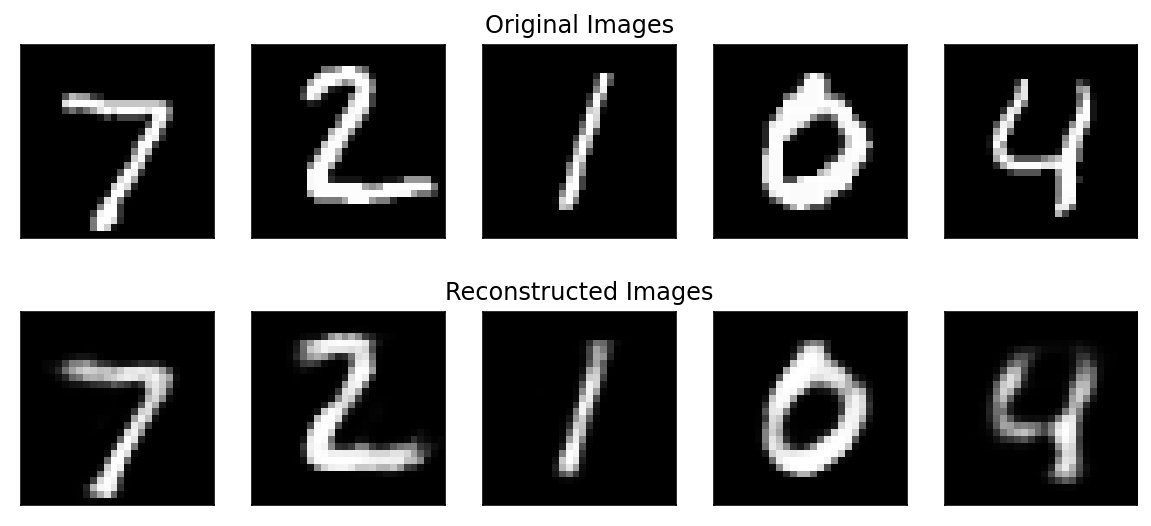

In [4]:
decoded_imgs = autoencoder.predict(x_test)

# number of example digits to show
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape((28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
        ax.set_title('Original Images')

    # plot reconstruction 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape((28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
        ax.set_title('Reconstructed Images')


# 降噪自动编码器（Denoising Autoencoder）

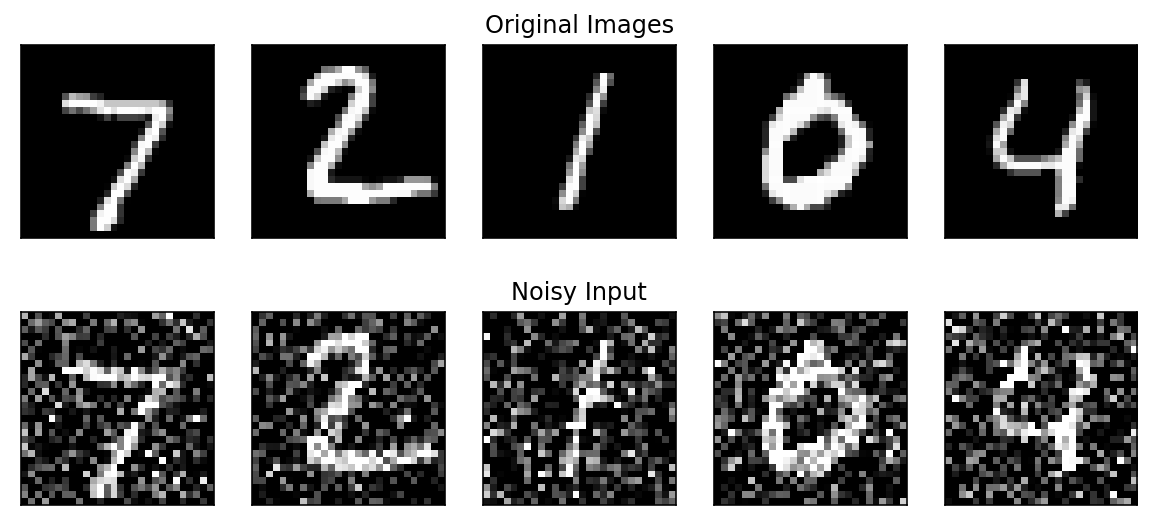

In [5]:
# 生成带噪音的数据
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

# 清理小于0与大于1的数据
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
       ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
        ax.set_title('Noisy Input')

In [6]:
# 输入的大小
input_size = 784
# 隐藏层神经元的大小
hidden_size = 64
# 压缩向量长度为32
compression_size = 32

# denoising autoencoder与之前定义的一样
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
compressed_vector = Dense(compression_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(compressed_vector)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1799
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1394
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1296


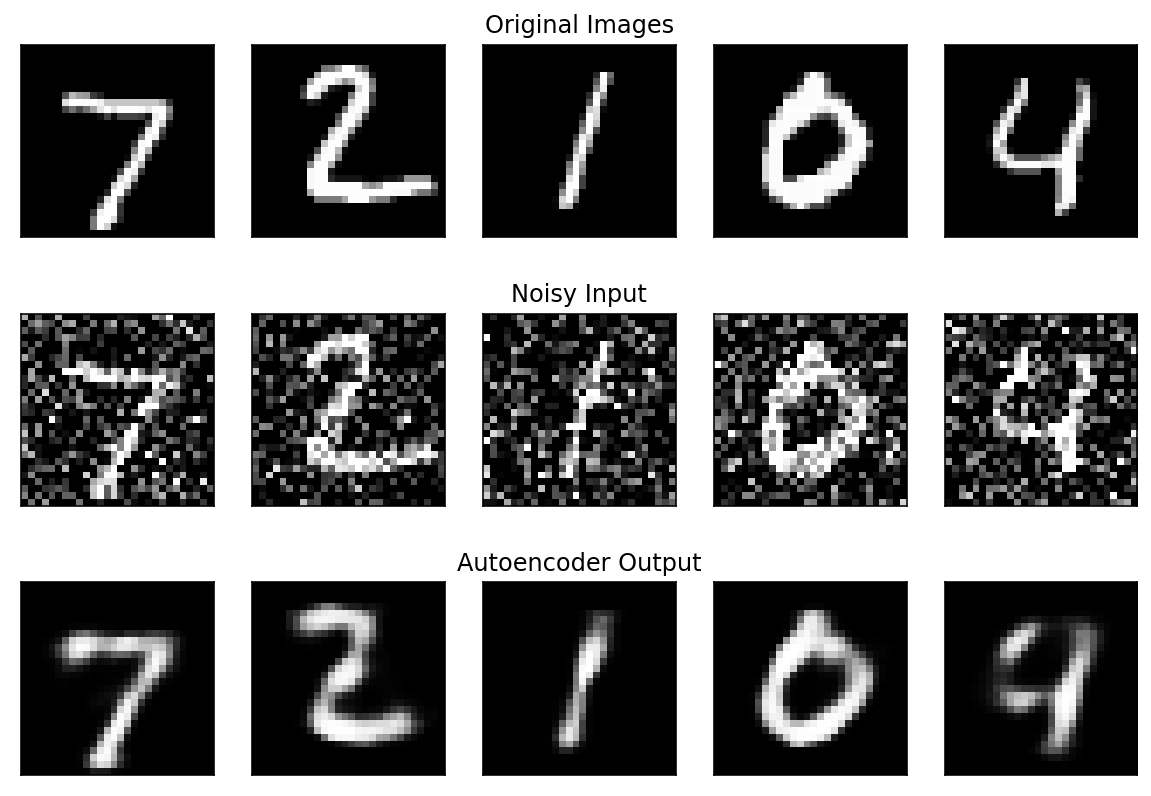

In [7]:
# 可视化预测结果
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
        ax.set_title('Autoencoder Output')

# 稀疏编码器（Sparse Autoencoders）

## 标准的Autoencoders

In [54]:
# 输入的大小
input_size = 784
# 隐藏层神经元的大小
hidden_size = 64
# 压缩向量长度为32
compression_size = 32

# autoencoder网络定义
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
compressed_vector = Dense(compression_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(compressed_vector)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=20)

encoder_autoencoder = Model(input_img, compressed_vector)


Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1549
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1084
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1001
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0965
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0949
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0941
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0929
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0925
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0921
Epoch 11/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0917
Epoch 12/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0913
E

In [36]:
autoencoder.evaluate(x_test, x_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0921


0.09212297946214676

## Sparse Autoencoders

In [56]:
# sparse autoencoder网络定义
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
compressed_vector = Dense(compression_size, activation='relu', activity_regularizer=l1(0.0001))(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(compressed_vector)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

sparse_autoencoder = Model(input_img, output_img)
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
sparse_autoencoder.fit(x_train, x_train, epochs=10)


encoder_sparse_autoencoder = Model(input_img, compressed_vector)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1631
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1157
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1078
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1039
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1018
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1005
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0994
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0984
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0974
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0966


In [28]:
sparse_autoencoder.evaluate(x_test, x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870


0.08695697784423828

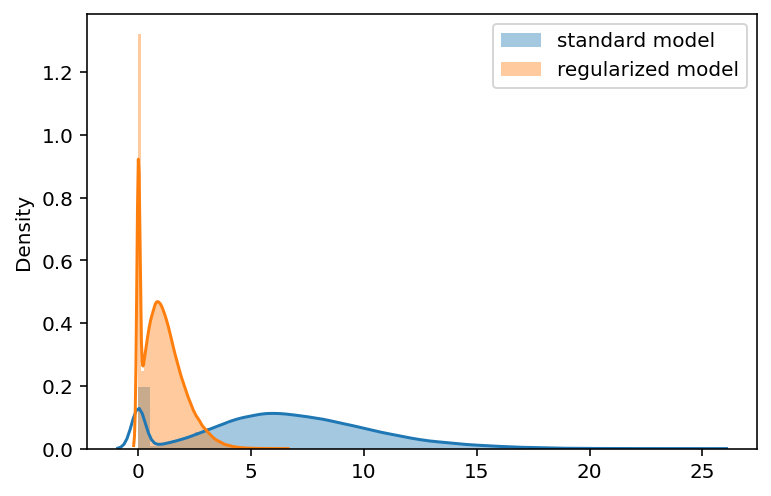

In [65]:
standard_scores = encoder_autoencoder.predict(x_test).ravel()
sparse_autoencoder = encoder_sparse_autoencoder.predict(x_test).ravel()
sns.distplot(standard_scores,hist=True, label='standard model')
sns.distplot(sparse_autoencoder, hist=True, label='regularized model')
plt.legend()